**Importing Libraries**

In [50]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

**Generators**

*very useful to process large amount of Data
It divides the data into batches*

In [51]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Dogs_Cats_Classification_Tensorflow_1.14.0/cats_and_dogs_filtered/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Dogs_Cats_Classification_Tensorflow_1.14.0/cats_and_dogs_filtered/validation',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)




Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


**Normalization**

In [52]:
def process(image,label):
  image = tf.cast(image/255.,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

## By this function all pixels values turn to 0 to 1

**Creating CNN Model**

In [53]:
model = Sequential()


model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 128)     

In [55]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [56]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
63/63 [==============================] - 9s 110ms/step - loss: 0.7122 - accuracy: 0.5170 - val_loss: 0.6789 - val_accuracy: 0.5030
Epoch 2/10
63/63 [==============================] - 6s 91ms/step - loss: 0.6613 - accuracy: 0.5930 - val_loss: 0.6838 - val_accuracy: 0.5380
Epoch 3/10
63/63 [==============================] - 7s 105ms/step - loss: 0.5909 - accuracy: 0.6880 - val_loss: 0.6237 - val_accuracy: 0.6540
Epoch 4/10
63/63 [==============================] - 6s 92ms/step - loss: 0.5423 - accuracy: 0.7230 - val_loss: 0.6146 - val_accuracy: 0.6770
Epoch 5/10
63/63 [==============================] - 7s 107ms/step - loss: 0.4515 - accuracy: 0.7845 - val_loss: 0.6761 - val_accuracy: 0.6660
Epoch 6/10
63/63 [==============================] - 7s 102ms/step - loss: 0.3773 - accuracy: 0.8265 - val_loss: 0.7553 - val_accuracy: 0.6710
Epoch 7/10
63/63 [==============================] - 7s 105ms/step - loss: 0.2278 - accuracy: 0.9095 - val_loss: 1.2977 - val_accuracy: 0.6540
Epoch 8/

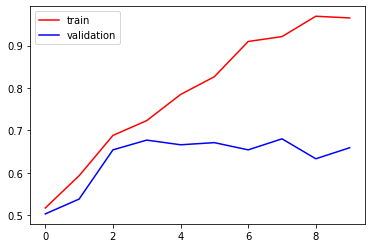

In [57]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [58]:
## Here we can see that if epoch is increaing then accuracy  is improving but the validation accuracy is
## fluctuating around 70 to 80 percent and we can also see the gap between two which depicts overfitting

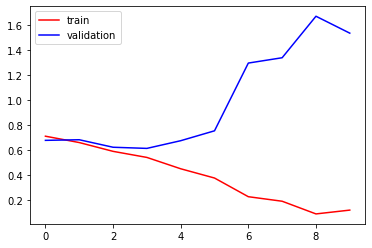

In [59]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [60]:
## Here we can see that if epoch is increaing then training loss  isdecreaing but the validation loss is
## increaing , we can also see the gap between two which depicts overfitting

We conclude that here Overfitting Occurs which says model works well on training data but fails to give good result on test data

**Ways to reduce Overfitting**

*Add more Data*

*Data Augmentation*

*L1/L2 Regularization*

*Dropout*

*Batch Norm*

*Reduce Complexity*




**Applying Batch Normalization and Dropout**

In [61]:

from keras.layers import BatchNormalization,Dropout

In [62]:
model = Sequential()


model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [63]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f7a8c3f6d30>>

In [64]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [65]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
63/63 [==============================] - 11s 123ms/step - loss: 5.5412 - accuracy: 0.5630 - val_loss: 8.3642 - val_accuracy: 0.5000
Epoch 2/10
63/63 [==============================] - 8s 130ms/step - loss: 2.3332 - accuracy: 0.5885 - val_loss: 12.9076 - val_accuracy: 0.5000
Epoch 3/10
63/63 [==============================] - 8s 116ms/step - loss: 1.4321 - accuracy: 0.5795 - val_loss: 3.3176 - val_accuracy: 0.4960
Epoch 4/10
63/63 [==============================] - 9s 131ms/step - loss: 0.9124 - accuracy: 0.5880 - val_loss: 1.4663 - val_accuracy: 0.5140
Epoch 5/10
63/63 [==============================] - 9s 130ms/step - loss: 0.7508 - accuracy: 0.6135 - val_loss: 0.9596 - val_accuracy: 0.5400
Epoch 6/10
63/63 [==============================] - 9s 135ms/step - loss: 0.5998 - accuracy: 0.6970 - val_loss: 1.2830 - val_accuracy: 0.5910
Epoch 7/10
63/63 [==============================] - 8s 126ms/step - loss: 0.5904 - accuracy: 0.6900 - val_loss: 0.6991 - val_accuracy: 0.6400
Epoc

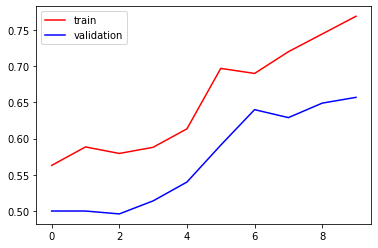

In [66]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

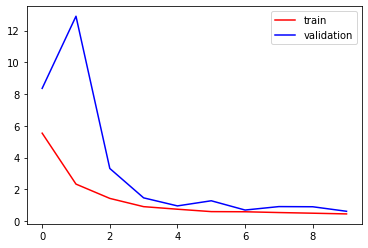

In [67]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

**Conclusion**

*After Applying Batch Norm , Dropout We can see that the gap of the graph between train and validation data is reduced which means overfitting is reduced* 